In [6]:
#Análise exploratória dos resultados da clusterização
#Importando bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [7]:
#Carregando dados
dataset = pd.read_parquet("df_com_clusters_atualizados.parquet")

In [8]:
#Explorando os clusters provenientes do KModes (clusterização dos dados categóricos)
cores_cinema = ["#1B1B1B", "#D90429", "#FFD700", "#FFAA33", "#A2A2A2", 
                "#001F3F", "#8B4513", "#F5C518", "#5A5A5A", "#B22222"]

cluster0kmodes = dataset[dataset['cluster_kmodes'] == 0]
cluster1kmodes = dataset[dataset['cluster_kmodes'] == 1]
cluster2kmodes = dataset[dataset['cluster_kmodes'] == 2]
cluster3kmodes = dataset[dataset['cluster_kmodes'] == 3]

In [9]:
# Dicionário de tradução
traducao = {
    'genres': 'Gêneros',
    'spoken_languages': 'Línguas Faladas',
    'production_countries': 'Países de Produção'
}

def grafico_barras(cluster, data, coluna, qtd):
    contagem = data.groupby(coluna).size()
    top_10_contagem = contagem.nlargest(qtd)
    top_10_contagem = top_10_contagem.sort_values(ascending=True)
    
    coluna_traduzida = traducao.get(coluna, coluna)  # Traduz a coluna se houver tradução disponível
    
    fig = px.bar(top_10_contagem, x=top_10_contagem.values, y=top_10_contagem.index, 
                 title=f"{coluna_traduzida} mais presentes no cluster {cluster}", 
                 labels={"x": "Contagem", coluna: coluna_traduzida})
    fig.update_traces(marker=dict(color=cores_cinema))
    return fig

In [10]:
#Gêneros mais presentes no cluster 0
fig = grafico_barras('0', cluster0kmodes, 'genres', 5)
fig.show()

In [11]:
#Gêneros mais presentes no cluster 1
fig = grafico_barras('1', cluster1kmodes, 'genres', 5)
fig.show()

In [12]:
#Gêneros mais presentes no cluster 2
fig = grafico_barras('2', cluster2kmodes, 'genres', 5)
fig.show()

In [13]:
#Gêneros mais presentes no cluster 3
fig = grafico_barras('3', cluster3kmodes, 'genres', 5)
fig.show()

In [14]:
#Línguas mais faladas no cluster 0
fig = grafico_barras('0', cluster0kmodes, 'spoken_languages', 8)
fig.show()

In [15]:
#Línguas mais faladas no cluster 1
fig = grafico_barras('1', cluster1kmodes, 'spoken_languages', 8)
fig.show()

In [16]:
#Línguas mais faladas no cluster 2
fig = grafico_barras('2', cluster2kmodes, 'spoken_languages', 8)
fig.show()

In [17]:
#Línguas mais faladas no cluster 3
fig = grafico_barras('3', cluster3kmodes, 'spoken_languages', 8)
fig.show()

In [18]:
#Páises mais presentes no cluster 0
fig = grafico_barras('0', cluster0kmodes, 'production_countries', 8)
fig.show()

In [19]:
#Páises mais presentes no cluster 1
fig = grafico_barras('1', cluster1kmodes, 'production_countries', 8)
fig.show()

In [20]:
#Páises mais presentes no cluster 2
fig = grafico_barras('2', cluster2kmodes, 'production_countries', 8)
fig.show()

In [21]:
#Páises mais presentes no cluster 3
fig = grafico_barras('3', cluster3kmodes, 'production_countries', 8)
fig.show()

In [22]:
#Comparação de existência de lucro
def contar_lucro (df):
    return (df['revenue'] > df['budget']).sum() / ((df['revenue'] > df['budget']).sum() + (df['revenue'] < df['budget']).sum())

In [23]:
#Quantidades de filmes que lucraram por cluster
lucrou0 = contar_lucro(cluster0kmodes)
lucrou1 = contar_lucro(cluster1kmodes)
lucrou2 = contar_lucro(cluster2kmodes)
lucrou3 = contar_lucro(cluster3kmodes)

In [24]:
#Porcentagem de filmes que lucraram por cluster

dic_lucrou = {'Cluster' : ['0', '1', '2', '3'], 'Quantidade' : [lucrou0, lucrou1, lucrou2, lucrou3]}

fig = go.Figure(
    data=[go.Bar(
        x=dic_lucrou['Cluster'], 
        y=dic_lucrou['Quantidade'], 
        marker_color=cores_cinema
    )]
)

fig.update_layout(
    title="Porcentagem de Filmes que Lucraram por Cluster",
    xaxis_title="Clusters",
    yaxis_title="Quantidade de Filmes",
    yaxis=dict(range=[0, 1])
)

fig.update_traces(hovertemplate='%{y:.1%}')

fig.show()

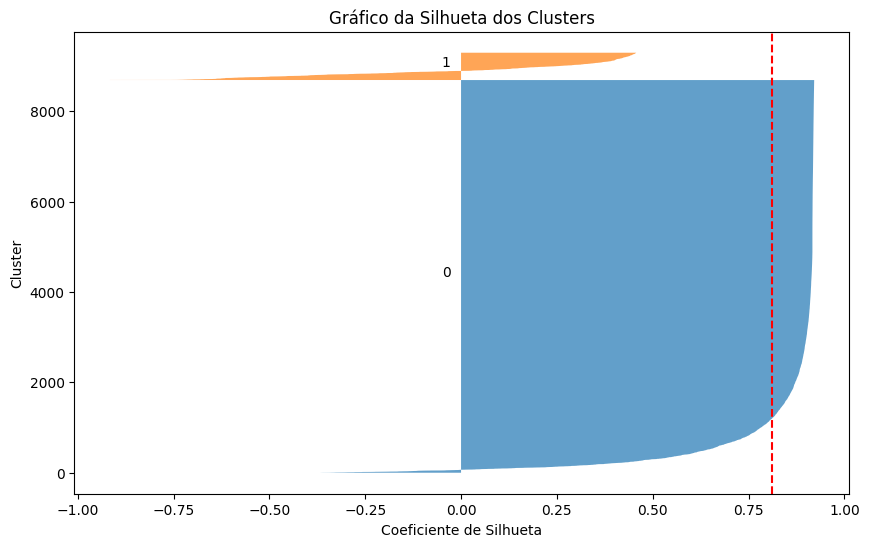

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculando a pontuação da silhueta para cada ponto
X = dataset.select_dtypes(include=[np.number])  # Seleciona apenas as colunas numéricas para o KMeans
cluster_labels = dataset['cluster_kmeans']
silhouette_vals = silhouette_samples(X, cluster_labels)

# Plotando o gráfico da silhueta
fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
for i in range(len(np.unique(cluster_labels))):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

ax.set_title('Gráfico da Silhueta dos Clusters')
ax.set_xlabel('Coeficiente de Silhueta')
ax.set_ylabel('Cluster')
ax.axvline(x=silhouette_score(X, cluster_labels), color="red", linestyle="--")

plt.show()

In [26]:
#Explorando os clusters provenientes do KMeans (clusterização dos dados numéricos)
cluster0kmeans = dataset[dataset['cluster_kmeans'] == 0]
cluster1kmeans = dataset[dataset['cluster_kmeans'] == 1]

In [27]:
#Gêneros mais presentes no cluster 0
fig = grafico_barras('0', cluster0kmeans, 'genres', 5)
fig.show()

In [28]:
#Gêneros mais presentes no cluster 1
fig = grafico_barras('1', cluster1kmeans, 'genres', 5)
fig.show()

In [29]:
#Línguas mais faladas no cluster 0
fig = grafico_barras('0', cluster0kmeans, 'spoken_languages', 8)
fig.show()

In [30]:
#Línguas mais faladas no cluster 1
fig = grafico_barras('1', cluster1kmeans, 'spoken_languages', 8)
fig.show()

In [31]:
#Países mais presentes no cluster 0
fig = grafico_barras('0', cluster0kmeans, 'production_countries', 8)
fig.show()

In [32]:
#Países mais presentes no cluster 1
fig = grafico_barras('1', cluster1kmeans, 'production_countries', 8)
fig.show()

In [33]:
#Porcentagem de filmes que lucraram por cluster
lucrou0kmeans = contar_lucro(cluster0kmeans)
lucrou1kmeans = contar_lucro(cluster1kmeans)

In [34]:
#Porcentagem de filmes que lucraram por cluster

dic_lucrou = {'Cluster' : ['0', '1'], 'Quantidade' : [lucrou0kmeans, lucrou1kmeans]}

fig = go.Figure(
    data=[go.Bar(
        x=dic_lucrou['Cluster'], 
        y=dic_lucrou['Quantidade'], 
        marker_color=cores_cinema
    )]
)

fig.update_layout(
    title="Porcentagem de Filmes que Lucraram por Cluster",
    xaxis_title="Clusters",
    yaxis_title="Quantidade de Filmes",
    yaxis=dict(range=[0, 1]),
)

fig.update_traces(hovertemplate='%{y:.1%}')

fig.show()

In [35]:
# Contando quantos registros pertencem a cada combinação de clusters
heatmap_data = dataset.groupby(['cluster_kmodes', 'cluster_kmeans']).size().reset_index(name='Contagem')

colorscale_cinema = [
    [0.0, "#0D0D0D"],
    [0.2, "#383838"],
    [0.4, "#FFC300"],
    [0.6, "#E25822"],
    [0.8, "#8B0000"],
    [1.0, "#FF0000"]
]

# Criando um heatmap para melhor observar a relação entre a clusterização categórica e a numérica

heatmap_data['cluster_kmodes'] = heatmap_data['cluster_kmodes'].astype(str)
heatmap_data['cluster_kmeans'] = heatmap_data['cluster_kmeans'].astype(str)

fig = px.density_heatmap(
    heatmap_data, 
    x='cluster_kmeans', 
    y='cluster_kmodes', 
    z='Contagem', 
    text_auto=True,
    color_continuous_scale=colorscale_cinema,
    category_orders={"cluster_kmodes": sorted(heatmap_data['cluster_kmodes'].unique())}  # Mantém a ordem correta
)

fig.show()

In [36]:
#Porcentagem de lucro nas regiões do heatmap
contagem_lucro_regioes = dataset.groupby(['cluster_kmodes', 'cluster_kmeans'], group_keys=False).apply(contar_lucro, include_groups=False).reset_index(name='porcentagem_lucro')

In [37]:
contagem_lucro_regioes['categoria'] = contagem_lucro_regioes['cluster_kmodes'].astype(str) + '-' + contagem_lucro_regioes['cluster_kmeans'].astype(str)

fig = px.bar(
    contagem_lucro_regioes, 
    x='categoria', 
    y='porcentagem_lucro', 
    text='porcentagem_lucro',
    labels={'categoria': 'Região do Heatmap', 'porcentagem_lucro': 'Porcentagem de Lucro'},
    title='Porcentagem de Lucro por região no Heatmap',
    color = 'categoria',
    color_discrete_sequence = cores_cinema
)

fig.update_traces(texttemplate='%{text:.1%}', hovertemplate='%{y:.1%}')

fig.show()

In [38]:
lucro = contar_lucro(dataset)
print(lucro)

0.6074808472284813


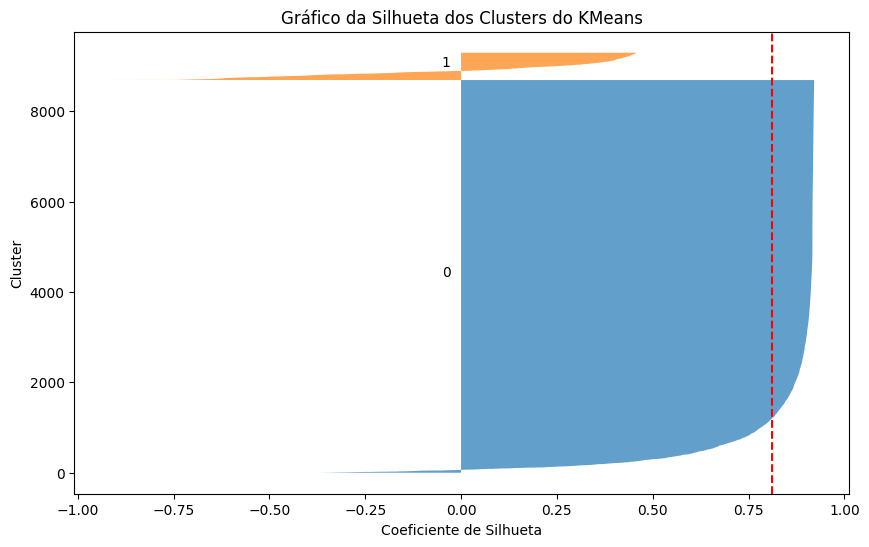

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculando a pontuação da silhueta para cada ponto dos clusters do KMeans
cluster_labels_kmeans = dataset['cluster_kmeans']
silhouette_vals_kmeans = silhouette_samples(X, cluster_labels_kmeans)

# Plotando o gráfico da silhueta para os clusters do KMeans
fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
for i in range(len(np.unique(cluster_labels_kmeans))):
    cluster_silhouette_vals = silhouette_vals_kmeans[cluster_labels_kmeans == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

ax.set_title('Gráfico da Silhueta dos Clusters do KMeans')
ax.set_xlabel('Coeficiente de Silhueta')
ax.set_ylabel('Cluster')
ax.axvline(x=silhouette_score(X, cluster_labels_kmeans), color="red", linestyle="--")

plt.show()